In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from sklearn.datasets import fetch_openml

In [ ]:
from sklearn.datasets import load_boston
from sklearn.datasets import fetch_openml

clouding = fetch_openml(name="cloud", as_frame=True)

/usr/local/lib/python3.7/dist-packages/sklearn/datasets/_openml.py:421: UserWarning: Multiple active versions of the dataset matching the name cloud exist. Versions may be fundamentally different, returning version 1.
  " {version}.".format(name=name, version=res[0]["version"])


In [ ]:
print(clouding.keys()) #shows the available outputs. 

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [ ]:
clouding.target


0      1.69
1      0.74
2      0.81
3      1.44
4      2.48
       ... 
103    1.36
104    1.17
105    2.37
106    0.02
107    0.92
Name: TE, Length: 108, dtype: float64

In [ ]:
clouding.data

,seeded,season,NC,SC,NWC
0,S,AUTUMN,1.65,1.80,3.33
1,U,AUTUMN,1.09,0.79,1.59
2,S,WINTER,2.39,0.36,2.06
3,U,WINTER,2.96,1.27,4.05
4,S,WINTER,4.16,2.16,6.00
...,...,...,...,...,...
103,U,SPRING,1.38,1.86,2.91
104,S,SPRING,1.22,2.28,1.58
105,U,SPRING,2.46,2.47,2.39
106,S,SPRING,0.05,0.02,0.09


In [ ]:
clouding_df = pd.DataFrame(clouding.data, columns=clouding.feature_names)
clouding_df.head()

,seeded,season,NC,SC,NWC
0,S,AUTUMN,1.65,1.80,3.33
1,U,AUTUMN,1.09,0.79,1.59
2,S,WINTER,2.39,0.36,2.06
3,U,WINTER,2.96,1.27,4.05
4,S,WINTER,4.16,2.16,6.00


In [ ]:
clouding_df['Tar'] = clouding.target
clouding_df.head()

,seeded,season,NC,SC,NWC,Tar
0,S,AUTUMN,1.65,1.80,3.33,1.69
1,U,AUTUMN,1.09,0.79,1.59,0.74
2,S,WINTER,2.39,0.36,2.06,0.81
3,U,WINTER,2.96,1.27,4.05,1.44
4,S,WINTER,4.16,2.16,6.00,2.48


In [ ]:
clouding_df.isnull().sum()

seeded    0
season    0
NC        0
SC        0
NWC       0
Tar       0
dtype: int64

In [ ]:
clouding_df = clouding_df.dropna(1)
print(clouding_df.dtypes)

seeded    category
season    category
NC         float64
SC         float64
NWC        float64
Tar        float64
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


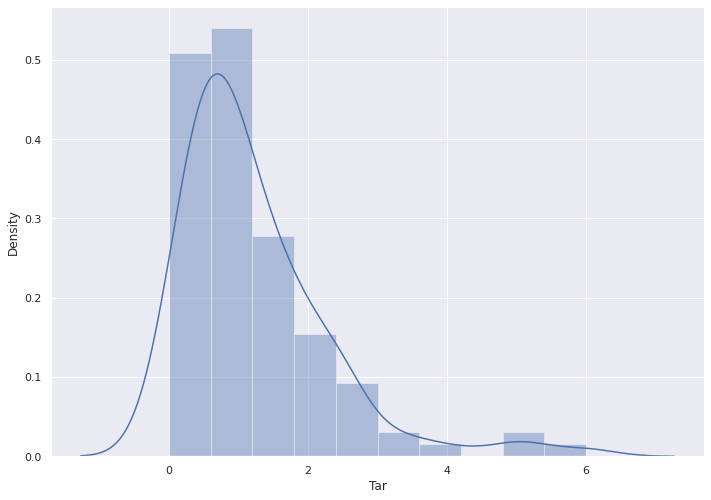

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(clouding_df['Tar'], bins=10)
plt.show()

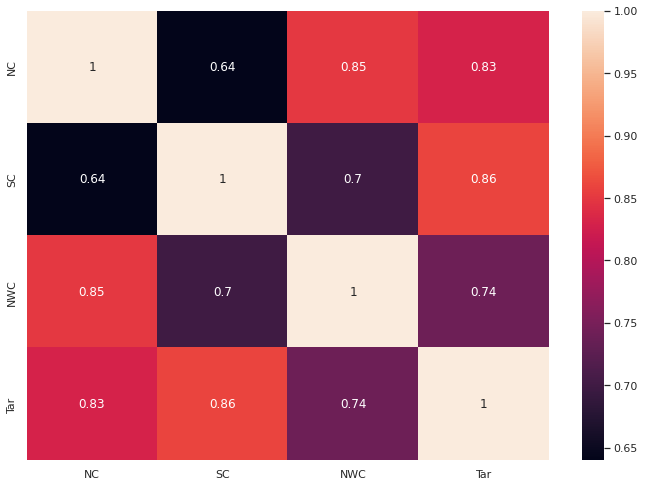

In [ ]:
correlation_matrix = clouding_df.corr().round(2)
# print(correlation_matrix)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

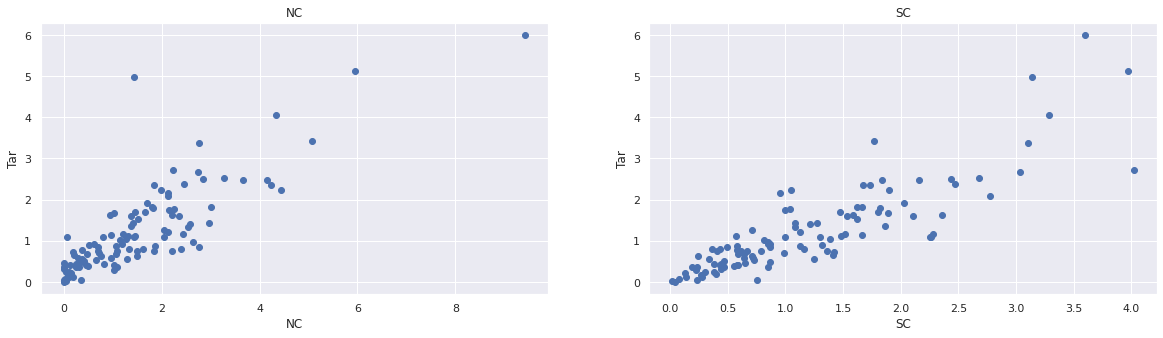

In [ ]:
plt.figure(figsize=(20, 5))

features = ['NC','SC']
target = clouding_df['Tar']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = clouding_df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Tar')

In [ ]:
print(clouding_df.isnull().values.any())
#dividing into  X and Y

X = pd.DataFrame(np.c_[clouding_df['NC'], clouding_df['SC']], columns = ['NC','SC'])
y = clouding_df['Tar']

print(X.dtypes)
print(y.dtypes)

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
testPred = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (mean_squared_error(Y_test, y_test_predict))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.4059009129867704
R2 score is 0.8732388775003169


The model performance for testing set
--------------------------------------
RMSE is 0.0701153289676797
R2 score is 0.8161465373410617


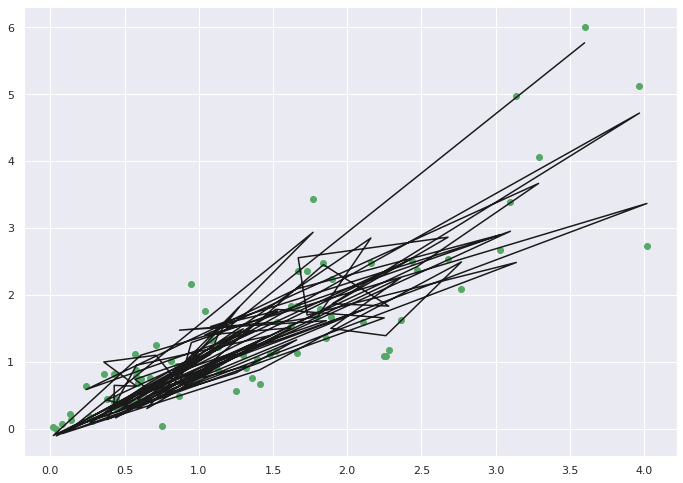

In [ ]:
#plot to see
plt.scatter(X_train['SC'], Y_train,color='g') 
#plt.scatter(X_train['YearRemodAdd'], Y_train,color='b') 
plt.plot(X_train['SC'], y_train_predict,color='k') 



plt.show()


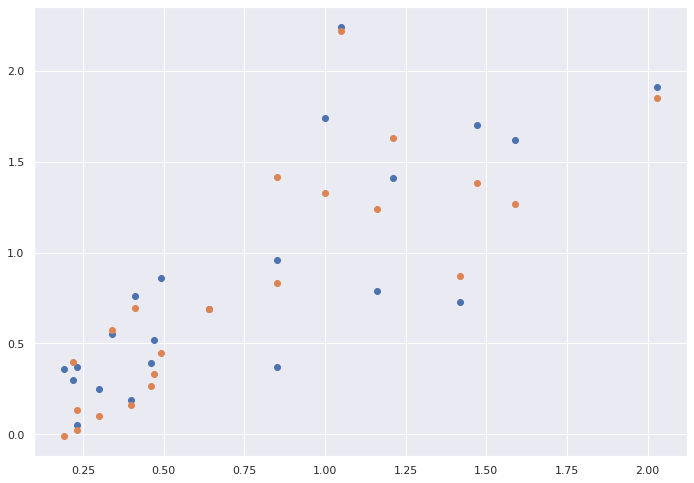

In [ ]:
plt.scatter(X_test['SC'],Y_test)
plt.scatter(X_test['SC'],y_test_predict)
plt.show()

In this lab we used the boston houses dataset to predict the prices of houses using linear regression.
Our model achieved the R2 score of 87% and a RMSE score of 40%.
